In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [0]:
food_list = ['apple_pie','pizza','omelette']

In [0]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [11]:
model_best = load_model('model_trained_3class.hdf5',compile = False)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
!wget -O applepie1.jpg https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2018_Maple-Glazed-Streusel-Apple-Pie_4917-600.jpg?ext=.jpg

--2020-02-22 23:05:08--  https://www.landolakes.com/RecipeManagementSystem/media/Recipe-Media-Files/Recipes/Retail/DesktopImages/2018_Maple-Glazed-Streusel-Apple-Pie_4917-600.jpg?ext=.jpg
Resolving www.landolakes.com (www.landolakes.com)... 45.60.62.207
Connecting to www.landolakes.com (www.landolakes.com)|45.60.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82355 (80K) [image/jpeg]
Saving to: ‘applepie1.jpg’

applepie1.jpg       100%[===================>]  80.42K  --.-KB/s    in 0.02s   

2020-02-22 23:05:14 (3.15 MB/s) - ‘applepie1.jpg’ saved [82355/82355]



In [7]:
!wget -O applepie2.jpg data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMWFRUXGRoaGRgYGRgfIBsdHR0YIB8fHh0aICgiHRolHhodITEhJSkrLi4uHSA1ODMtNygtLisBCgoKDg0OGhAQGzElICUtLS8tLjUvLS8tLS0wLS0vLzIvLy0vLS0yLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLf/AABEIAKcBLQMBIgACEQEDEQH/xAAcAAADAAMBAQEAAAAAAAAAAAAEBQYAAwcCAQj/xABAEAABAgQEBAQEBQMDAwMFAAABAhEAAyExBAUSQQYiUWETcYGRMqGx8CNCUsHRBxThM2LxQ3KCFTSSJGNzssL/xAAaAQADAQEBAQAAAAAAAAAAAAACAwQBAAUG/8QALxEAAgIBAwIEBAYDAQAAAAAAAQIAEQMSITEEQRMiUfCRocHhMmFxsdHxI0KBUv/aAAwDAQACEQMRAD8AJmKKQGVqezs/qQw9Y1Llk1Uq1R2v/MT2GxvhjUslqjzpt1rvt1gXMcVOMtUxC1aEhzpoRUXcOPMe8eQMJ7SrJgKd5VLWRUKFquWZuur62gdWZOOWoapqHfyaJbIMFMUVzZqlcyFoDkvzhiz7uxOzBu0MBJVKSebWgCzF+28GenobQsGgN5o3RKCpJTqCSlYI1BW7hnSDcq6C0A4nFKfQgkJRR91Hcn1FBsG9SctUVa0gEgp1eWgE7wMUIWos4Ki9VAivoGHvHdh6y/Gy6mvcD6wnLsWtyFLLaSxDhjs+lqOw9YZ5fjsQtSUIxEzmLOlcwNe+vyhVKwZKvCRVjajqLsDXvTt7mLDK8qUkhCVfCQpSgmuvSwSHuAFE2F09S2hiDuYjqGxAbAWYUjBYhv8A3uJ2HxJN/wDxj7KwM8qUDjcTpSwcFA5quLbBqjd+kEzVeENSSFrBCQCrdZADgUF31bB+4PzHZiiRLAK0OALOsqJc2AFVVLk794pU2J50leJsBPKvBTOnTVL06TMmcqQSQSp2QQGAqzkhnsVeS/0txEyZzzpQkhTFSdRUrrpBSB6v7w+xM6cv8WYlQTqA5RXlJ0pJtQkk9SfIAzA4+eSmWg1BbTqIfd/LzO4iV+qVTQ3ladO5W+IxxHG2EwpRhpSdelkXCUskEEgn4m01t6x7Xmn96hBSVyZTkskAiZVnL/lF2770jnvH2Cwsmbzp8GeBqGglKFHsmoI2JS28UHCWdlSUytaikFnSBTsHpR/aF5cpC2eO+3v949OnUC15jvPcSMKuXzMFlIl6QBq5g4Lh3Y/D7RL8bLCMbqDS9RAUqgdg3uyh5xW4vIFYjS60LTLWFpKkmigTYn8zQn494XxM5XiSkpNBUEAggC4OziAWjv2Pw7zUcKw33/qCyMqmB5kuaJqFByC6WsbgsCL1IhJjVqXiEYdUtRmPrSlQLBP6g/5XF9yIJyXNp2H5ZyNK90kg6i4aocUoYfSuI1FQStCCkUYgOB2N4UTpskfCVnX/AK7wrASUBGhaaA7dfqqAsdmWDlURIlF359CVHUPMGrwRxhilSpMuZKAmJWAWccpFam4SWUlxWN2KzDD4/CBKk/hkApAAZKhZm+FSVdO/RowXXmND33ku3NXJ1pmK0rky0q8PUSEpdbkgVSohxs1q2qXNmZhiEytM+TMShAYrEttLdQDQB6khmO0IcIpeCxSFIQUS1F5YcWtcE/hmz09I6CnMhiCkHQXvLN1BmI3BHZ2a9Ia4Ciief2hsxNECx+0n8wy7DS06wmUtCwD/ALq71oHINP4MTGDzeWcR4aUBSCG0OkhiC/M7igi1zjh1E2SJJCzLNBpVpXLqxKXBGn3iUyn+miJWISVT1FJPKlkpIBdgtTqBpQs0aDj31Gj2EFHgmaZccPMdKlBCi8tQBsdj0UPnDDLRPV+InDPMmAazN0y0rUAS4QtQGpvzC7Vs8O8fnEuWgolKDIIGsakhWxYEkjoCSX7WgKVnypRIQklQVQPMVRj8ISpxc1f0jg10DvGlSRcQ59PxSVJVPSPCunRpKQ1nKbAd6V9t05QV4K1SXLFiwJA1BiHsDykHsLUiqweJWQFqliYkizJdGmnMDZ3vekbp82SVJmEAnSQAWIL9RY02PU0eFvluiRBLVtI/E4+UmY3hKM0hlKls7CwYP9ekeZuJXNTTUoAqYkKdtwe1PrFPjc0A5EMlqsgAD2FImMzzGX4pBWxOz7teDxZD/qDBZQ3IgpQpnKS3VjHgGDU4CbMQlSZiyLlVAT5EwNMlTEr5mCSa6vkfO3vFK5wZMel9DMlmDJKoFXKZIUC4ND0fsdxSPUlcPVgwsSR1KmjHGHXDXDLhDJmQxw86GCBHksAhjUR7w+XykuyBXrX/APZ2gTDT4PlzY2gdyIM5UUiYsLBCnZwXHNZVDeooHfZoBkonTVhQ1p0khLOCVbnsOx2d4NXl8zSXSpKfiUlqlttSfy9RfetYNw08FJSZidTgpdYp5gkcv+37ACVMxMJn4ZRIUNwHAsCAXAoaPHmZgynTMchgX2YG5q1t321QVh8wSfhZvMN79I04jGSyDqWhIeoKgxG4tbe1Y0wAYXh5oTNSsVBISQAaagxFrOY2ZdlfiLKV0CWp170sAduvzExeYSxLUEqBWzpAqSbps9zvBGE4hSg6loXvdgOYId66mCkmwNDHAes4tUrZ+CSmUopSlwlRYpSQos9d/nG7CpAlgHSUn80xbA1d2uqZ1FHY+QhsfxXOmPLToCSzaAVFXZ1MCOxSH+Ub8FkmLxLGY6U/qmkkj/tSbexEHpU9oEZZjnaSwQ6kpU7kaEKUzUlgalDsdSnawFdWHxRVNUJr6ggM6Q4BAIIH5aEd/kIp8l4ckyTrLzJn611PoNh2hPxll6pk+WuWHVp5+gCS4foTq3/aEdUtYjvUf01HIBKDh7FeJL0yimigFFtLMbMBctSzOfKF+bYZcqaMRIlzJgJImaOa5qWTuCNm3pCvhbK1SZqyrGITrDlCQ4dq8xUxIPZ7Qyy3Ff2KlyNRmpcl6AAE0Ia5qRfbtHlHSBTGxLih1HT8PWec9yiXjpIRODT5dUuWLGrPsCP82ieyTDjCoJI5H5aAEp2etBua1MdB0pxEtQYlNwRcV2HTqOkc34vxcxEtRQklQ5SQHY0qQahn3DR1nIoQcH37M7CaJuOpnHf9qdC1DSQCEgOoDqSHCT2Y2tBWW8fomDUkhSbcwKS+/T6COVZLlPipUJj1YhWqoq5LEG+5esWmVZFKAYLC2uCm/qP4hmQJiXTqNiH4QbzFZS4yXJxz8q1FPQpDdCCbexiSMkyJ/hzArS7B2ue4/aGuLmf+mD8GTMMh3IRUoe5YsSh9w8MsRnuHxGFUuZpWnQ6FC7ty17lhWFjy7G6Pf3xFqxB8vHzm/J5oA0HnlqoRQ36O4bt5wJl3DsuXNUqSuYMOtQ/DUk0VVyCxoQLaS/WAcun+FJDOo6W1Ev09WY+cLsy4pMpYI5VEfAgOd2Je3RzWAxBySo3Ec+Pcm5XZ3w/hH8bE61bjSnSkAnfQ1bAkq6RHZlO/tpstUggS1KoDUJJqkgF2szOdrwGvjKahOqZKnGW4dSlakh6MQWoaVg04WZmMtK5GHKJaEnVMWVIQojcFQ5lbcriK6ct5ht8YpaQcyywuMmTUjQQ4LhbMWatC4VcsA3paPk3xBOSEpIQeZJLqLn/cenSIPIuJsRhCpEwgMQAASQU+ZFx3aOhYXNZSkomKWQVNRL77lvrQwjInZu/f37+E5lI3UbTfg8OZusrlJUhadKiQGUAaOd2MIs3y2ZgJeqQnXJLDVLdSkE3CmqoP+avfrFHhJZWkTErUZOl0/DyuauRtU1IoCXsILxvEqZSvDUEiluYm2zBiDsbQ9cKBKyE+/p79ZOGcP5Rf5TneH1KUC5JNQQoi3pX3htMw6VvQOWqi5NAOpUST3+Tx5ORSZy5s2SpUsrLiWVESwo1UwHMNR73LtcQBh8fMwytM1JU5HMp+UN1G27+VrCQi90NiXF9XPPpN6OEtKtU6aoruJYAFO51OT1DDeDx4A1ApQEseUgVomlRcEGxcsL2gnDYiXipaEFSUKAUASaEPQM16Pq2q9oUScqCkrkzXlqpoWBYhzUFnd3KSx77wzXvZ4ijx5oBj82Sn8OSGUVUUampUGDKIYNcAeQgSfwx46vxJoSSHIAWSp97gM/YiEub5LPwU2WZqkrcEpmICgl3PK53avWp6Q3yvNlqmJIskAN1qd/nD3RkFoZoYMNpox2QTcIpaNXioWhJQbMQocvQMmoa7mtHheJqk/EhQ/wDEn5hxFxjcedCULQiYBUEanDnZ6HytA8yUghJUgoKn501SCG+JP5aEWJ8obg6hDs3Mkz4cjHVJWXmSBdQHnT6wTLziWPzj3hyvCaSx0noQXBHUHcR6GGHQReFEgJgMnOT+RC1eSSPmphDDDYjFLDhCUjpUn1gzBYFyABFhluWpSmogtEG5ywgS+UqZg/p+8YrElIJBLC5hrMkpFyR6n+Y1jLtQoFEeQ/cQDsi8moVxDi8U4r130X/+H1gRM2b+UrT5FI+iBFMvIFn/AKfsGO/Q941zcAEABQKWsASD9IFWxv8AhYGbcncVImBC5hClMP1KqXarKFIYcM4CXOWUrGs6QoFLpA6guHO28FTUqWnQfhPe/nDjh3BDDpKZSS6rkufQPYQ0KLnXG+XZbLkklICTQPo/cXMFYrMBJlKmKU6UVJAvsEgP8RLAV3jXJwy1nnNOkA8fnw8EEgfFMQPJnV89LQbNSkwsa6nAM9YHOpk9QOrSg1CQH9yGf6R44qy9aEBQNC5LJOo9y1G7nfpEll2NJmiSpaEyynmVQqSxFn3f72jquR4VCJKjrUosxWtWo1sGAHnaPBbU2Tznc7/8/aeu5XEAUG05bkKVTJnhyyH+V2dR2gniTNZctYSp/FlkoWkEn4Xuz9XB6ekFcHcOYyXjMVq0JkJVqC2crcAp0gXSEly7VPV2YZ1kErG/jS1+BPYJUWGlYFtY/UP1D1ejEQniAtx2NzDnM05Bnakc6CSCLXBHlFbhsxRNSVpdJupNCCaOQDSwAbp5PHMsrRMwuIGGmhlKLoIsbME3Be8dGwOClagzooHBJFCCC7g+VCP2hTasT0vBhZtDjVW8UZvk+GUtRlEYeabpuhQ6hjyv2t0hFh2lTtBWyttJ3HQipHz7R0E8O4YpAOqZq3JL/wDAB+3iX4/4YSlCJuHCPwgHSOUqS4p3Vu9L3h3hsbLGKxZwDp3jlCEzkpL8y00UCCTpcGjcw3sOtIiMz4dmJUUgJ0LVr5FOlXcDz+bxR5JnjS0aqih8n+/lHziTFPh5qpKdSk8zCpcMC3R7RMMulgBsTGLaNdSOzXNTJQESk6l2SnZ/1FrAfe0eOFpssTicQl5hq5ANXDlmY9NmhvwRlCJ0k4qeXXMUTRuVIbSALs31MfM4y4BWpILg3ozUagH+KxUQqgp85niam3lbi5EmclJ0jSnSVIISQpB3P6mIHk0M8QvWllqLup9KSRc0HoI5rLxaiyFUIBF7j+YecM446Fypq9IU5ClE3Y0e7UHo/aJyCoNw3wWtg8RDxNh5CZiqqXsQUsFO9Hf5iAkZhMVuUh9uvp+0Nc+wZmCpBKaaUlx6HcQvw0rw0urezXdjbcX7Q9GUoL5jVIUR9geMJ6R4SuYaCLkXejWI7lvS8ZM4rUWnzQlKUJEsMFaWBLAmxPuzQPw5h5U4ErSVEPynr/uv86VjWrOpshfhqlBSHB0sGbYWaMZtZ0fWAFUkkCO8rzwqrKQF7OztZqkN2jTnfDmLxaXC6h/9Mhh2JdgezmD+HpWFMnVh5TE2Qo6tJcuNNzcDdqWhsMcoS2VhihnTykJDmzG6Rvs8Bj0YzUnctq8onO+GsBjpE0CdLPhgt4hPK1XsXc9hUxfSZgWJqVIU4SyUqA1GpZ9RAoBRWrpaJvibNClQl6piSG1JUdVCHDEl2IY7M+0JpOcqExKUzCfYqq7bOz94aQC2oi/lG6Sy7mpSzfFCFpxOHSqUaD8QAXrepFKm3nHvLlSRLMqUiXKCjdK5ZLtvzOaDz94WYfK8W6ZpSAUvWYtiQdm0q6neF+JRMSoyxIKlsLAFz1DO4Y9KQpgp8q/C4QCH3956zeetBKdQKblhQXPpZm7eUZhsIrGJB5pUoByEkJK2epJBYbdfIRqRwzjsQvUTJkoTRKVzA6gWqUywvez1gPCKxKipGhZUhRQqoGkgsdRNB5vBhKUEEXM1BuJdYHIguXpko8NSSSEaipKhT4V7eR3O0DysGdTEMRQg7QDk+KVhlpVNnyu6UqNQQ3xMAB3ityuejE/ioQUD4WLk0pcx6HS5LAU8/vPM6rCQdQ4mzKsCzOIeITSkeJMto3JEXSSc8kZddjVjzEOx8v2gXJ86/DKZoHiyzpW1ibgjsR7xR4PFykpIW7MzgPHO+IU6JqlhQLj5pqxF3Zw3cR88iDIPMbJhX2lths4SssKGGasOmalinUN3jl+RYhRUCHIeOq8PTXq0Y2CsoF8zAYmRk6ZZoHHeGCMO1hDfM9BCmIp/j79IDwkwER6/T5P9GNkfOcZ5kohbxqhH9jiFTSyUI1gt+ZJBS3cqZPrFAlokeIp8rMdWBH+klX4ixMCQpaX5PhUSkKYkgXSBa7s2REW2jMSOzeXtvOb4VHiEoTLQpZIBrYNVQPWgjpX9PJqpU+ZhwdUssRMUS6qEi7Fxa28B5ZhsFgfwQVSlgAKSQFh2pzXdmG9LNA82YiUqZ4c5KtQDaQolv+47X948V829genrfvtPZ0F10kc/CX09YQROQKGigO9BQUHRu8Tma5ZKC1TUzChB5igfE52ANn+2hrw/PKpCQSOd+oLhKWYhg7vU/wAwlzqYpRCdKipRYJCga2Ny/fyfaE5L5Uc/L3tE4lpyCZtwGPSUEaCoBVAlnSWLuVO4f942TmKTMUtSE0cUfZmZt+0IczRPwqQqXInEgGqa9AzIfv1JicnZpOmzgMQpUmWo/m1JNthsz2oYxenZt/T4xx03ayoxudJw6qzSouwKixKT0F7dI8Kn4jFo5RQEt132JF+5Ee8uynCiayQlRQl3UAdR3JcGu33V7g5clQCQgSyp9K5ZGmnYDSPWMTQG8os/KC5NXUj8uybFykqC5RCH1CqCwqaAE9SWEP8A+ynTHnyyEpcaQA2oMzt3GzVepgrMsuUmWFlSpiXOpuQgC1KnaFquI0pSEpS6E2BcW8ySfOGMbbdd5yh2HlhyMtmol6kSjpJJVLSkMf8AcivroPpCXNxyukmwd0qDMBUd+oD7Q8k8RS1geIFoOwTs27kaT5F/4Fz3FyZiQQkhTKUTynUAC/wpd6g3a/YwRdfX5TFxNq8wnPFzZqMSCVAoLDyL33r97RWIKSAUm7d94TYnKjPCv7cvpI1KVTTbrcs1o3ZcmZhyEzbWBY32g8oDqCOfSNDBTQjbPFTigTJaUlQISqlWoAW/NWj3tCPBYdcmeFTHHiBi+9e/R4tpU+WmWFzFJIN0qsR7GFuEnyZq+UAsCxWnUzOzU5RtQesT48pCEVBCkmxxPmM4emhZnSCJZZq1JHpawv8AKFOOxCpziajSpBAbdx+0V2KzMJWUqSp2aooaVDkCxp6RH8RzlLUZiQAtDC9VDYXaGJ5mo8+s5CV3M04DFqw5SoJ1MSdNWat2I8vWHWZ8WFMoaPimURqUWBGxNwRcdhCXLsxdOhSQ+4VcbM/Qi20N8JgDKmJJShctXMg/EEmrX3u/nG5KG7Dj5xhAcX8JznP81neKpKwVE0evRqDqIe8IcKT8VJVikcplnlBDFbXDd+/QR0TC4PDTZitSEpWQHBA33p62hzk2F/tUmWkApNU9DfvU7tFGPqVYAAUPtIcjEH85z3BZ6UvLm6goO9Tq1bUO3pFhk00TwdKkzVoPMxZx0LUJez9NtpLP+EcRi8S0tpdS81TM9CzCpJhRM8fL5yJa3BS5SWpMq9X/AD/xS0K8FGpl+Eo1Bhp7x5mP91h1ArbRsbMxZlDZdqexMHSs7cpaSnme+lQJbcE6QT7wWri9a5QTNloWFpOpJDEpq4cdq2p5tETn50TQiUyULZaFEuya0/7gRpL1o+4Jzwsbny/xGiyPOP0nQsbhcJNw6JgloSEkCaqXyqQ9iwcKS+yvrDng3DoTKWlKgpSZqkrYAMWSUsBspCkrHZUcn4fzOThpomnETyr8wBQAobuWJvtWOicJZ7Im4qbNTPbxpcsGSUn4pbgLQR/soUs9BXaLMFDICfT0kXUo2ihxLPTHoCPqSDUVHUR9Aj055chJCgBHjH4CROA8RKFdHFoRSc0ejwR/dg1MfL+Eym4REc4TLZMsAJCQBsBYQxRjkSxyM8SiszCReF+IzZzeG40yXY+MyUmLzVySaE3EfcrzDmKRXt9/dIjJuZkmhHeGPD+K1T0Ancn5H+YowYimQN+c6VmdZ5/ayZk4oKtPwjZRLAO1g59gY53wxxAmSsLSS5LBIA0l2DACoYP12i34hypU+QqWhR1DmS9iodfOvvHM8mQrDzySCFBRDKFRuQOlR2i7qxqE9DoWABHrzL/MlSsYJuIwyvCxI/KVHStnDN+VRf3vENOxExU7Sp9T1ILv62bf/iOj5TnQxKAiehlKoVhnJTUdyQwLdu0RfFOEVhsYFLSPCWrVqRqYpoxqSNyL9DuYgxNZIP3l2NtDUf5lzkmap0JkKKhsCCKPctuAYnpM+XgMeZBmPMUl0KLAEElwO5YF99oLyrFmYSQtKZYFFKagEeuI5WDxUtCcQsL0EELdTgbsUig9tokVuUf7ic6EN5e/MpsPjpc0CoSo3bf06wLj+GpOLdE5yj9QofQtTbrvAOUhEoFMqStRSG1l1EjuutDQvuIZKz1cnSrlZTuinLU7sDf6R2OlYFjx8ffziWxtwkmONclRhEIXhyQhNFsVqLHclRJuPr2bVgs+WkIBSS5B1OAasBVi+9+sHcQcZIKFIUlKkq1DmalLO9ol8pm+OlDJIY1PYf8ADgxTqOnVW0diFjRknQkZjyJM0jUVgAaktViA4vu8MZmVSFyilSEuoF1AAGu4OxG3eIDifBePhiguTLVrSQSC6dwRuEmDOA+Mlzv/AKWe65qRyrA+ID9TfCoexhOFWZS9xOZCp8s8z8jmSZxQvmk6eVYuQAAynLBfbf3ZvJ4XkLlkBS1BQI5lVAI20sAe7Uh9mWEC5SkqDk2Ae7/T1iYwGbTMOoSZstaVrJICwASxqUrtpYO12vGOHBuarnIvO80ZVl6cvlmSpBXL1FXiEuQTso0bzsaeUbsZiZMwABJUlFaqLJPZmV6ORFdhsEnEIC1KdFQQGIP7RM8S4VGFCULlslThOkAAnuSQHbqfeOUZQPErnv8AzMVkLaTzJPEzlKOo1FadvoKR7xyEyAjELLIKdzR60pX0bqzxpxePlyJa1lKFJWyQCSSk1bSXYGj12EIuE878fGk4hhLCVBIqQklQa/YGvYRQuMlS1bCU5M4U0Jb5BxRJxiy6DYEu9yVOXcnpG/EcDyphVMw81eo10LU4bok3T6uPK8fMXw/JSr+5kAJW1dNlC9RZ+/vDbKMfpr0iY5Rje04PIkpsi1iGdlKSAlYUlSKEi47VcXr3gfhzMSVqwi2I1MXFD/uDVFPukUeOzFE/Ug6kKP6aggVtcGncQxyxGHwqTOTLSpZGkkadSmahUampc9KQQZW8pO3r6RupkG457QWZw8pS0KQAClI5q71Lte1rV70YzcCEArmEkIIIp62Bt0jUviiSQoqKpbAkpW46VdILg9+0aDmOJU6ZWHIBDuspSAf9upimna5r1gyuMcG/fvvEVkP4tpun46WAWCi4LFgANj39KRGca5ghcpyEHTZVQQrbq7G3aAuKMyx0uaqUjCTzY6koJSQ1SFIfVXyaJ45bPnH8TSgq2WFX/wC0tB4sT7O5oRi6BxuY/wCGsUJkttQJGoszjmFux/iFnEOE/ClqY6klQKgaNQt8z6P0jdlGTz8NWYDMlOBqkAmpNElxynYUY9YrJOJloAC5RSUnV4SkuQdiokMVd26+UY7DG+tdxGglhQ5kzlGRyp0kKWpMtG6yAVK6gPt3t5xuxOS4eWQcMpfioJ1OqpcUUGLAWNG3i1wxlzFCZ4MtSQASdLhIHYBgX3+y2XKw2LRyJt/1E6TcW7po0Ers3muvyiXbSdx9oF/TvNZk0LlzCSUgFi9Ksam4NDFnE7wXkngCYsqdSlaQ1tIqC2xLuYpDHrdMD4YueZnILmp+e5U0g7w0RmiWYpf1hcSIxKBEDKDzBnvFT+kLMRiD1gjECF81MMQCYRPgxDGK3gvKxiDMM1Ly9LG4qbMbghiXFiBEtgMAqYsJZ3No6/kmCEmUlAvcnqYYBZmAVAMHi1yljDYhTqP+lNb/AFR0LUE0bje43A5p/UXMVSceVg6pa0S1EUPVLjvyesdfzPAonSzLWC1CCCxSRZSTsoGoMck/qRg5sybJRNA8RlS/FsmYkEFKqWIdWpO1xQiH2CKMNb1WvMfcK4VWIQmaOSU7pJd1Ev8AClrE7npR7xcqyWWuVJlT5aZqAdQSXUEg6qi5ZnoKGkQ+QDELnITIUkoQ7eItSQWAfSEgsAAfLu0WuaHESEiZNSkhBBUpChY0JIUK+aevaPJZDu49/eeqxOyXJviXJJctOjDJ8NMzmZJOn4qaUklkkVYbv2hHk2LmpK5aCoGtOtPnDTNsylM4XXSwUTzAUsLVDC+1oSSszQuZpl8zJAoat/uP8PGJqZTYlCHSKMbp4hmyUKBmaQQ5dgkHpSxO0TeZ8T6nWDrVRhpIFOpYEw9Tw+iZTEalA0o40g9On3eC8q4KVhWSiT4xvrcH31MxrZvJ7xqNis9zFZGIO2wMnOGOGpuMm+NidSZILsoNq3YJ2EV2BkLGImED8IC+kgPag8hG/EYlUtLqIJA+FjymlO8aDPUuUVFRc2AsABX2HvCMuZsm3bidjxn8RjSXiJQJBAU7MVJ5QT1BLM3aHMrMxJGhgGLFqUFLANt0iIGbKCdEsOSliyXJ9wen/EDSctxMwAqToDAc29RQgW8w8KXEV3uoboh5nRsPM8RQU9ro9rVFevzjRxjJQuQ6lFBS5Sogs46/8/KkTmQrITpcIWKaS7P0e4+6Q3w+faJngr5FgPoO6eoNlDakYuRksVf5+/6k5SmBXtBOF88UtIQClmAS5YDYCnTq3SKHP5H91h5kmclbgatKWFU1BSSX+wImMwytCJiZ0iXoQsspKQAlKjXUwoAau1H7mrXC4qx1HmYJAFVEdzs21oYmfSaWyDNyYw1MNjOLY3KEpdc9c1RBIShZZVTQHoTS0FYXJcPLbUklW5c/KL/P+DE4pQnSiRNCitXOpaVmnVylg7AUZg24gsYspPM4YtW79D3j0VyFxsYAoHcSuyafoTplrKh+hR+hMEHElKiUi/5T+3WIDDZxpVQ+oiky/iFSviQJiR2ibJ0xu40N6QjMcUk8xSaGzsQesbcuzhB1gzQlLEHxGdIa9w7HuI0zZsicOU6FH8q6e20LMXwzKmgomHmFiD9I4IlU20PWa2lVPy4L1TkqWqZLQCm7qUFBnSAadnG3cFrk3GUuYdE4aFuR5N1e28JMBkUzwpaE4pUspSEkpuoAAVJ/aNGO4fmggqxKFEBkzFh1UsCWrRw5rYP0zyMtXxFbE+adMwMxMxPiA6kNtV+4j7neKEmUVCUVJTdwDc3rs5uKXjlGAzTEYWa4qU3cOCBfS5I969465kefysZK1gOGDihYtUN7iDw46BW6J4Pr/ETmTQQw3EhRxBPJUqTLCEVCmlpL9BQUZ/nE5neYkEmaaqsA1717dovMfk8kPLStSE/pKQfYtX3f6xHZ3w7hkTCsTFrSqyDpLEDmIBve31pAKoG7Hj87lmPIp/CK/wCRJL4imgKTL+J0kMHoH/8Aj/EU2W8XgtKVL8NWoAGxV3UDuTUqZ3eCsnyLCYyQZZHhzJZ5FgJSpwTTvSEuMwc9BVhpqEialKlyZl0rYEgvu7M21fOGFVZRQi3caiGnX8lmakLP+/8A/hH8wc0LuG0NIBFipWzUB0j5JEMnj2UFKBPGbmfnVRYx8TPhjicuoQguR16+n7d4VTcFM3DR5+mHPcycI0a0xplYCbM6p69v5imyjhIaSSo6iCyibHy2gtM6bsgy8KILkKFQR1Yj94tsHNISAttbBwKs9B86RP5LhlSSy7G/+0v8h597UBolytQBSWOygAWtWvlDEFCCYSsxJ8cIfDFQRrKFJUB02J9iR5ExUzDCjN0apa0mygU+4giL2mqaIM53lOaeCtBdihQII2fu9Rv7x0yRjUY6WZS5oSFAgbEpLsQmtWeh6BrxyHH5YuWsBVK+/lDvKczmShyEu7p6eb7befpEmRa+s9UEOB69jKOTwBLQggHUsfFq1qdj8QABZ68rUa5uU+K4fXhZ6ZkqSspSk6yoaUquXD3Ah9w5mk5ipaTMOv4lUCSARRRp0oNvMw9xGfolgSpktK0zKKSairOS/L9mJjnNkN9Zvhup23iWVOkrl+LLWo0cjlABKa3eN+AMyZhiULOtNCl3LbkCpaupwNm3eE//AKKmTNWuSknDKJJSS5QTbSXch9qmohrkMnw0pnILEFqmhSXY26UiZlVRq7dpQWBUjvtE+Jy8S5a1TJilLO9ktTY17XgfCIViUavFKAoKSkgAs3KCxuKC+0UvEmTpmpCmel0lTAtcWPe8TnDWCUmWmSAZipYCSUAmgPq0MVxpu97i9RaJJODxGWzgJswTETLTA5SSer1B7H0pWOuZIUzpKCghQIYkm3cAiJzGcJT8ShcucEoBq6zvt8Lt+0KcLKn5ZMTImr1o0uFA0U1GANXBrs/SCzL4o11v6esUPMNAMss5yErOuWyZoFRVpjWuQEml/eE+NwK8SjwpkpaJsqqJmn4VdHspJsQCeuwiowWdyp0tl8pIve/+IGx886WV8SDfZST32NflCXKqNSH36H3vBUv+FhJPE4laEssktSgetBZ6esLF5nMVyBJKg5DFi/Ul2YD7vBGYzVzVqly0qXqslADk9z/MTmaf3cpQM7DiXIcBRFSn/wDI2zelL0huDDYsiVtkVdo4w+aTZsyWVznIZJ53YCgDmnd6RKf1Fkqk45aVEiWtpksuCFBXxEMS/PqHUNaOkZFiZZTyIS4qzCj2JPQsD0h5nGT4bMMMJM/uQQ2qWoChTfboC7MYPp83+YgjtJ+qvSKn5+VhwAFoWC8NcqxqkfAoDqnv27QnxEmbIWuVMT/pqKVDcEH6bjsRG7CTErVyq0k7R6jLYka5KMq5GeINJqQe9IcYeVImtpLNUMWIPpEFipK5ZqQX6QflK5i30Jt02iV8AqwalAeW65M2W5SSodix/gxpUszAQJp1fpX9iNGX4yekc41J73j1mEsTmABSS1Wt6xJpo7/GM1GLMWcTKPMUmW1CK1pQvVPoYP4VzleHmF0uFilxuD/IfvGYjBTUAh/ET0N/Q7+UCeJ4iQU3S6fUDfzBEO2Za2map1BOfSMRKSMQwV+ouA/mPKFOIRg5aPDVMnOoataASlVaB7O+wr1IiGRME1KasWIAL08hZrmKHJ8xPhKkzUpmJAAQFAUNKijAEA+dISwK7tvDVV/0J/SFZJm2HwxXNrzE6i6mo9rlRL1NawyzPGS8YiVNlisqc6KMVApOlNasZmh7PpEIJsyVPQdKCyEatIajWBBoARY2oelX39O8KZqk38OTztRtZon2ZSvRPWKem1MwFcRHVFACe86Dg8OJctEsVCEhL9WDP6xtaPsZHrzypx6eNPMA5LO12/eBMRhVLZhyvcVijRgEi9e7/bQVLwI/KeZ/txuPL5RFpuMEn8uwtACHYfLf5w9w0tgx2guXg0u5SAdiN+lf2MfZ0oIPbaN01CuaULAWx/MAR52PzEEiaQpiwBbSepq486W84BxTFiNqH6/zG+Wyw7l/NQYsKs42b08zGrMIhE4wqzNXKPODlzQ+l6s9fr0hZmyresEOYJ4kPxE6lFixBDH18jQ2ick5zKlzPCIOl6Ehh5bMG+sPc1U61HqT9+wiax2X+KCw5vqw+vSCbGG3MZjylOJX4PNpxQmSh1arJGk0qXfq797RScLcPLW5xKNQFCFKatqFJuGHSOeZPNTgjLLlZLEkXYt8L7DYs5vZmuMBxWiWygXaikJKdR6uwoQTHk5kZT/jG3rPYViyfnL3L5fL4Jk+JLB5XS7AEs9KKHp2gHH5UZbIQ4QaJKyWTuxIFU/OMyjO0zUAkzJYsFq0fF70FmHn6Mcywap0koE51CxIKS48iXeJiC40nkfp/cm3R99ohm41aAJISVrDEK/KATsDcPue9oLTNmF/FnMbaUsXPmN/WFeaZZNkSxMVNFCAqta1NS3t9Im8VnSgpJltMO7ny9B59ozwHO0oAVhtOm4LHSW0lSn/AFdfeI/jKTJIIUpQ0lwVCjvRjb0ffzjMlySYsa1zdMxtYYAgKqQ2p6+3pAuY8WzsKpKMYkKkzA3igOkvstJ+d2g8ZY0BvXpz94vQFYlTBcmx4IZwbmlYeZbiQslK2PKxDOCDSohJP4flpUMVgdKdTa5SapU1jLaxNmFLM0OuHedZWEukgPs3Z7PCsyqfMn9GNDWpuVODxeGlI0lKEKo4QgsALWAD38u8KM6noVLmJDFK0qCgQNj9XjfMmYWapKELOsO7BXXvSnqYExWSSlFTzzoJLpDAt0c1+QvtD2zZGFGv1ElXEoNm/wDs55l8syClLqMs2TqI2PK/Tp0r2i94ako0VXqBYPQhPat9+nWN+DyrCTJZSJMpmLKXqMyzAhw3kA7RIcP48ypqpRWQmWok7uDYiz2Y+kY7eJ517cyoEspTiNf6k8NS8dK8SR/7yQlgkXnS9x1KgxUPMhuYGOGlHWO5KxssTgtJ56qUDVN7VLsQXG9N35eb8cZGJGJJlhXhzgZqXHwuTrQDvpPsFJfqbuk6gnyN6bSLqOn0eYSbw2LUk/ESOiqiGknMwCFoPhrBtb0bcQtnSNLVBPQG3nGlqXsfX/iLSoaTBiJ0jAcTyyl5gKS1WDj5fvBKc7kH4JiY5nIxZTd/SDsnXrJdga0/iJG6RRvKFy3LbMOJEoDJGtR9vUwky3MpgK1kanZ3sCOnpf0j7NkJKL6T97QInHoly9OoeQuT5C5fpGJjUCgIZMNyvEiadK0hQLnSzgV7wfmiiNJSTSikj8yT2cV6fbS+JxWlkmWxYG9C77xslyJmLJ1kJlpAK1VCUgddySdty0M8KzcA5AsocmlTDySQxmFKdAU6i5Pwu16B2sSTYR3nhvJk4TDokhiq6yBQqN27CiR2AiS/pZwgjDpGIWjTMKfw0G6AbqP/ANxQv+kUpWOhGK8WPTvJMuQuZ5j5GGMMOiZDHD/mHb16OOtxHzQRZ+rPben8QclHQkGz1+Y9GeMmJehD/ex/bvElRsDGII+KoNH26VGxrH1XNyVINh+YdwdxTf8AxGnFSgWZ3sDv5EeR+7wwy7CeEl1fEfYdhHDedB5OCCEkE6ibn+BACJKkjUg13DCrP82pf9wWmMW7t79IW6xLUyqBVvTcxxHpMmvFErSlaC6k1ABYHqHI6OH/AGeAcVigtOpmYVBILGpYtvB4lpFUnlqWDNW+3Wt4W5wrkWev+BGpzMMiMaXp7/e0DYaXu3WvmR/DQXik1b09I84ZF2of5D/Q/KHwYjzNfO5BoK92O0MMqkynHiOxblDpBF/iFb9xHzH4LUT5aT26t73jxIwgUPDTcWrt696tEeRaFT0seQbGWWG4kloQESpSkAWZZPl8er7EN8s4pWDra92oxo4Ie0QuBlqQWBb78i0FIlqSOQcz1FSVDZu9dogbAgO3PrKtYIoidWxWEk5jhwagXdJFCelWL9DHP844Vn4BetIM+U9VS0kqHYpDnpZ41cN8WmQoSCOXVzAu/dhsdouMHxArT8SSAH1FaQWNwRsR09oFnbHsw+8EI6m0O018IZkJieb4knSQ1jS4vv8AXpDVOUyJiFS5oE2Wr/pkHSPMF694GXj5E6UtSFAkMApAOoG6WG4c73c7mJ7KeJBKQtE0qE8OTLq4Y0Z2YNsz3icKwOpRt8xBKl7rY+k2p4LXhQJMqcZkhRZKSOeWDXRqc6t2LBgN43Ky0mhMxAdiVcnsOvu8apHGa9Gkykkv1LuOw7OfaHM7Jv7nDS1Spikz9AXpmkGpD6VMKNZw7d4PIjZDtsfr9YalsQGr4xGmVh5atepU1Q/Vcd9hGY/MUGytnYmhFfn/AIhfLybECchE1ICVqZTqA78u5oHobP0MFZhwVLWpCpWInI5iF8xKU0o4UC3MQPeMXDqIBaNbKoN8wnB49BCXLFusKserDeKJpWE/lVsCFMGfo9IIy3hIlahMnqpQOpQIO4KRt05n7QfiP6ZYSY6gyVH8yZkyr3cF3PmY1MCIx83wiWzqIpxKpbpOkdQobjoe4/bvAvFuWLnYR5YC0ypgUQkWSUqCj2FU77VtFJheEJ0vSgqTOQkggkgK7guR8o0YPCr/ALgoXKSpBKhoUTp0fCQRY2Zi+3WMDeE4PpGsVy4yoM5BNwu2/WF0+S0XGf5DNkKmlUtakIJ/ETLUEM93Zkv9fSJPETA9I9wMCLBnj0YsUmNakwTMgrLsrVOUxUmWGfUtw72CR+dXYbA9ILUALM6rgv8AdrKNGos93Lt08t4+S8O5rzX/AOYa/wDoJSvQV7OHSQVH9ITUgkVGpnpQOIfYPJEoKUrSVTD8MhPxHvMNkJ7GvYXgdX/mFXrE+WZMZnMo6JYYKWa12SkXUo2CR9Kx1T+n/D0ta0rWhkSy8uUa820yZ1X0Fk+caJPC6vBE1agZjKSlKQyJQKVsEA11atLrNfmYoOAMOUgE+gcv5HtDVTuYpnviWuDoSIIUYHl0V7xvUIMRZnx4+RhEfHgpkl/DINSfPf1+UfJh8mPz8ulYMx0v8w+/KAU1Ydb/AL02iWNhOBlD4y72D3bz3jbiA4YVjyoFqRomFgwN/p1g+IMCmydNiabP5VO4bzgFE0ldfv7aGi5o/wAdBttAM4BTON6/5ejwBE0QKZiEqoQwVZwa1oX27b1HaF2aUk3JsH3v9YJxKaqS3KC4L1B2DNYbV7dICzlTS0DZx9DG4+8xpK41LO1tv3j7Kk8m4f8A423pGYsbVG/8RktDpFB/zD4M0LJ7wGSQXS7/AH3hnMQP0v7QMqR03jp0DxGLWzJ0p7gGFmk+IFqWuh/Uo08n9WEOFSep+X8wJMw5rb7tAjGoFAQ/Ea7Jm/DYUyyVgOQU2arnr0q/pDDAz5s5TAhKHapDCtzv6BvOFuFxZSgy1khJ/MkVH+IYZVLRpISrUNwxcAF6jeu9bxDlQi7E9PH1AYAAzouSz8PgxyqStRLKVqLgGzNyp+vWJfiKYlUz+4lhjZmqU9S3maXaFwUtnchIckl2A9ekT+bcUL5UykkpSalYAeu1bHuB5RLjwuW23huyY973ldITo0H4dcwFTdB32LCH2X8QmVPKSxALCtSHO/zjnOW56qcgoqFJVqINTpcV7sfusHnEnV1Ijn6ck78xiOrrvuJ2rMp0tcsTX0CjqcBx06PvGrB4BMt5iFFaFA0ISQR0Uqrl+gjls/iZaZJlTHCSE0HYuPnB0nPwhOlKyFKSHqwNQbdamtHhTY2vVW/19f5gLh2Kg/1L/GZYqfMSuVyCy6OxTRunQP2gbGrmSjMTVkJcK5g4ZyXHT7aFuS8QqEsoUCSHCXUBa24P32gadxBMqpTkpduwPo9jatXhWSnN1vMXGymjVCEYbjJIopL1Buo7bajR/WNeJ4gw8xQ0hUkKrMWPNNWNh/Mc+x+ZSJUxcvUWCmcAMkFixcixpTpGmZNK9KUVQRci+qrt6xT4GpQDx+ghqcd2BvOqnP8AQvwJiVrJSRpCQQtyakWKVJYd3Mcj47yhGGxWiUClC0CYEG6NRWNPVuVw9WIvcuEFYUnWpiCGJuGZq/4EMeJ8xwyJyZy1mdPCUJUELQQClS9QKmZKkq/Ju4Pk3pwyvQNiojqFULch8tyoLCzN1JZPIBR1GzkudIoWAc0Aa8PZeAVILrm6QEhKVqS6ykMWlyzVFWuUvAs7iJbEIQJZUzKQS7Vd1qBUSaWaxu9BZWo3VR++7bnyHtF4xE7mQnIBxHWHxOqYRKBQVHmnKLzS9zqNEPW1epMWXDmDky0ASwyixJqST3UKuOkQklWgO5avXtD/AIbxuk85ud/P67Q5VAimYmdImTPwXUymKHIf9aQe4vC/g5agdJIYUA7P3rGT5jyVqlrCiACpJ6OHI8qn0jVwjh6lWp+Y2ehfuO29YKDLhQ5h5wSoQOo2MExk6ayY+R9VAWIWXpGzIF4juOz+heAjLCVPc2ft3rGRkIhzzOn6blrD3LRrLlRNxajC19hGRkZzNgk5dXPn5M0a1r5e37mMjIydFWa0cguD+0Ls1LpQPuxjIyCTvOaTeYEJIDnUo0bcnzpHxEwpDFNa/W1PvzjIyGwJ4M9+hq1Cam+4j6fI1B6bXvH2MjROmjUWcAmna3lA85ZBqCPbe0fYyNnTStI6btYRoCWILV6hgfkYyMjps2T8bMI0FSyk3D3+cBEAX9oyMjAoHAnEk8zUQkcwJSRYh3D9CGMNMtzKUQEzVHUTRXMdVaBXfvHyMgMmNWG8PHkZTtKLH4ITEJDPY+jVjwjLwFPV7n7ePsZHjaiNp6quYQpcyYQVADa+ws/X/EKuIc38N5UtX4llLIPL2D3V3t+2RkUdLjV3N9ojqMrKNpGHLkFzVR3a9e6jBuspl+EVTCig06h6Bwxbs7RkZHplRIAxHEyVj1oAElakNsbDyd6jaPMlKQXNT1JN/aPkZHAAcTCSYalPNq07U/iG+CyqbMslLdzGRkbBjo8JzlFLrlt/5H5N+8N8FwkkMV4mjPyyzb3EfYyNnR3hf7WSnlK1KahITX3Bb3j1lHEUoLYICCSACkMCSbKA+oHvGRkZOl0lbgeUEy7CMjI6dPEyNJRGRkbMn//Z

--2020-02-22 23:05:48--  ftp://data/image/jpeg
           => ‘applepie2.jpg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMWFRUXGRoaGRgYGRgfIBsdHR0YIB8fHh0aICgiHRolHhodITEhJSkrLi4uHSA1ODMtNygtLisBCgoKDg0OGhAQGzElICUtLS8tLjUvLS8tLS0wLS0vLzIvLy0vLS0yLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLf/AABEIAKcBLQMBIgACEQEDEQH/xAAcAAADAAMBAQEAAAAAAAAAAAAEBQYAAwcCAQj/xABAEAABAgQEBAQEBQMDAwMFAAABAhEAAyExBAUSQQYiUWETcYGRMqGx8CNCUsHRBxThM2LxQ3KCFTSSJGNzssL/xAAaAQADAQEBAQAAAAAAAAAAAAACAwQBAAUG/8QALxEAAgIBAwIEBAYDAQAAAAAAAQIAEQMSITEEQRMiUfCRocHhMmFxsdHxI0KBUv/aAAwDAQACEQMRAD8AJmKKQGVqezs/qQw9Y1Llk1Uq1R2v/MT2GxvhjUslqjzpt1rvt1gXMcVOMtUxC1aEhzpoRUXcOPMe8eQMJ7SrJgKd5VLWRUKFquWZuur62gdWZOOWoapqHfyaJbIMFMUVzZqlcyFoDkvzhiz7uxOzBu0MBJVKSebWgCzF+28GenobQsGgN5o3RKCpJTqCSlYI1BW7hnSDcq6C0A4nFKfQgkJRR91Hcn1FBsG9SctUVa0gEgp1eWgE7wMUIWos4Ki9VAivoGHvHdh6y/Gy6mvcD6wnLsWtyFLLaSxDhjs+lqOw9YZ5fjsQtSU

In [8]:
!wget -O pizza1.jpg https://www.washingtonpost.com/resizer/M-WnldvRmvg3qyWg0Om8ssM6E3M=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/UM4VXMMJ5Y7T5MPQALWPL73RGM.jpg

--2020-02-22 23:07:44--  https://www.washingtonpost.com/resizer/M-WnldvRmvg3qyWg0Om8ssM6E3M=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/UM4VXMMJ5Y7T5MPQALWPL73RGM.jpg
Resolving www.washingtonpost.com (www.washingtonpost.com)... 104.127.145.76
Connecting to www.washingtonpost.com (www.washingtonpost.com)|104.127.145.76|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.washingtonpost.com/ [following]
--2020-02-22 23:07:44--  https://www.washingtonpost.com/
Reusing existing connection to www.washingtonpost.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘pizza1.jpg’

pizza1.jpg              [ <=>                ] 384.84K  --.-KB/s    in 0.1s    

2020-02-22 23:08:04 (3.52 MB/s) - ‘pizza1.jpg’ saved [394079]



In [9]:
!wget -O omelette1.jpg https://msmarket.coop/wp-content/uploads/omlete.jpg

--2020-02-22 23:08:11--  https://msmarket.coop/wp-content/uploads/omlete.jpg
Resolving msmarket.coop (msmarket.coop)... 23.185.0.4, 2620:12a:8000::4, 2620:12a:8001::4
Connecting to msmarket.coop (msmarket.coop)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604131 (590K) [image/jpeg]
Saving to: ‘omelette1.jpg’

omelette1.jpg       100%[===================>] 589.97K  --.-KB/s    in 0.09s   

2020-02-22 23:08:12 (6.34 MB/s) - ‘omelette1.jpg’ saved [604131/604131]



In [0]:
images.clear()

In [0]:
images = []
images.clear()
images.append('applepie1.jpg')

images.append('omelette1.jpg')

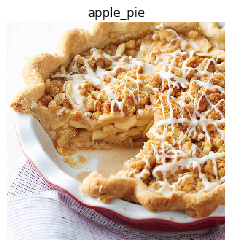

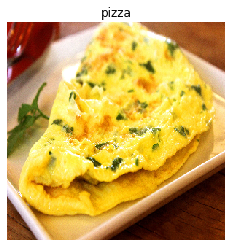

In [23]:
predict_class(model_best, images, True)


In [24]:
!wget -O applepie3.jpg https://whatscookingamerica.net/wp-content/uploads/2015/03/ApplePie423.jpg

--2020-02-22 23:14:01--  https://whatscookingamerica.net/wp-content/uploads/2015/03/ApplePie423.jpg
Resolving whatscookingamerica.net (whatscookingamerica.net)... 104.24.101.83, 104.24.100.83, 2606:4700:3033::6818:6553, ...
Connecting to whatscookingamerica.net (whatscookingamerica.net)|104.24.101.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14853 (15K) [image/jpeg]
Saving to: ‘applepie3.jpg’

applepie3.jpg       100%[===================>]  14.50K  --.-KB/s    in 0s      

2020-02-22 23:14:01 (41.5 MB/s) - ‘applepie3.jpg’ saved [14853/14853]



In [0]:
images = []
images.clear()
images.append('applepie1.jpg')
images.append('applepie3.jpg')

images.append('omelette1.jpg')

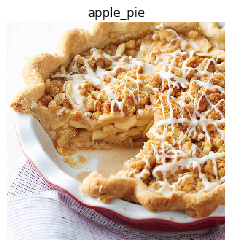

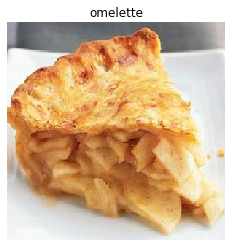

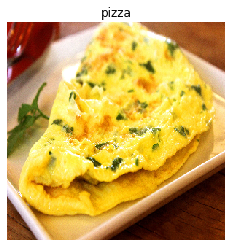

In [27]:
predict_class(model_best, images, True)


In [28]:
!wget -O applepie4.jpg https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2F1518642883%2Farkansas-black-apple-pie-with-caramel-sauce-sl-11-17.jpg

--2020-02-22 23:15:50--  https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.myrecipes.com%2Fsites%2Fdefault%2Ffiles%2F1518642883%2Farkansas-black-apple-pie-with-caramel-sauce-sl-11-17.jpg
Resolving imagesvc.meredithcorp.io (imagesvc.meredithcorp.io)... 13.32.85.40, 13.32.85.56, 13.32.85.105, ...
Connecting to imagesvc.meredithcorp.io (imagesvc.meredithcorp.io)|13.32.85.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566711 (553K) [image/jpeg]
Saving to: ‘applepie4.jpg’

applepie4.jpg       100%[===================>] 553.43K  --.-KB/s    in 0.1s    

2020-02-22 23:15:51 (5.16 MB/s) - ‘applepie4.jpg’ saved [566711/566711]



In [0]:
images = []
images.clear()
images.append('applepie1.jpg')
images.append('applepie3.jpg')
images.append('applepie4.jpg')

images.append('omelette1.jpg')

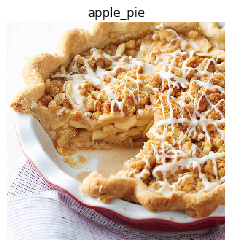

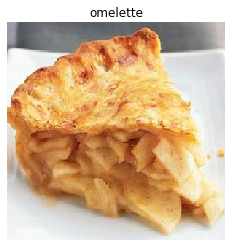

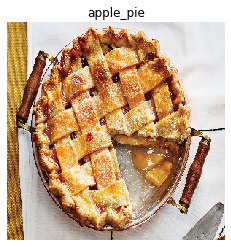

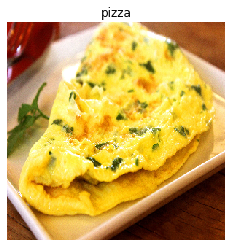

In [30]:
predict_class(model_best, images, True)


In [32]:
!wget -O omelette2.jpg https://c.ndtvimg.com/2019-06/8pplcvj8_omelette_625x300_03_June_19.jpg

--2020-02-22 23:19:31--  https://c.ndtvimg.com/2019-06/8pplcvj8_omelette_625x300_03_June_19.jpg
Resolving c.ndtvimg.com (c.ndtvimg.com)... 23.66.61.129, 2600:1402:3800:291::24e8, 2600:1402:3800:281::24e8
Connecting to c.ndtvimg.com (c.ndtvimg.com)|23.66.61.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34284 (33K) [image/jpeg]
Saving to: ‘omelette2.jpg’

omelette2.jpg       100%[===================>]  33.48K  --.-KB/s    in 0.05s   

2020-02-22 23:19:33 (617 KB/s) - ‘omelette2.jpg’ saved [34284/34284]



In [0]:
images.append('omelette2.jpg')

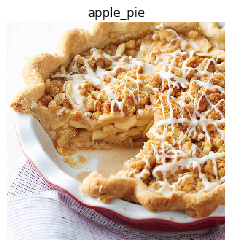

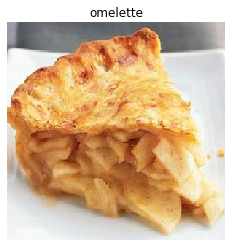

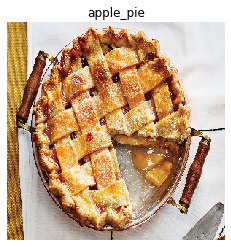

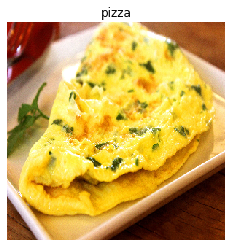

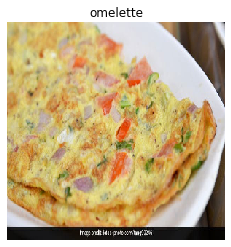

In [34]:
predict_class(model_best, images, True)


In [35]:
!wget -O omelette3.jpg https://i.pinimg.com/originals/a5/86/03/a586036f4e8bc949acc4c9fc868fa438.jpg

--2020-02-22 23:20:45--  https://i.pinimg.com/originals/a5/86/03/a586036f4e8bc949acc4c9fc868fa438.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.46.200.206, 2606:4700::6812:fb0, 2606:4700::6812:eb0
Connecting to i.pinimg.com (i.pinimg.com)|23.46.200.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15210 (15K) [image/jpeg]
Saving to: ‘omelette3.jpg’

omelette3.jpg       100%[===================>]  14.85K  --.-KB/s    in 0.001s  

2020-02-22 23:20:46 (10.4 MB/s) - ‘omelette3.jpg’ saved [15210/15210]



In [0]:
images.append('omelette3.jpg')

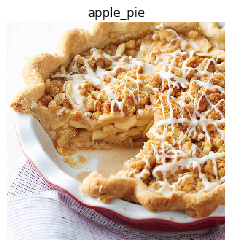

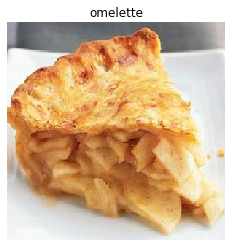

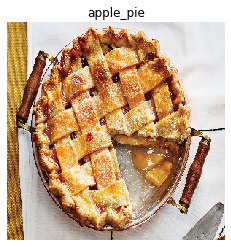

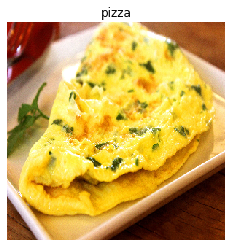

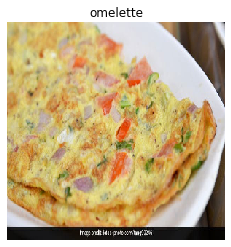

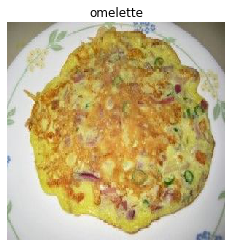

In [37]:
predict_class(model_best, images, True)


In [38]:
!wget -O pizza2.jpg https://upload.wikimedia.org/wikipedia/commons/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg

--2020-02-22 23:21:56--  https://upload.wikimedia.org/wikipedia/commons/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657369 (642K) [image/jpeg]
Saving to: ‘pizza2.jpg’

pizza2.jpg          100%[===================>] 641.96K  --.-KB/s    in 0.1s    

2020-02-22 23:21:56 (5.81 MB/s) - ‘pizza2.jpg’ saved [657369/657369]



In [39]:
!wget -O pizza3.jpg https://www.monsieur-cuisine.com/fileadmin/_processed_/8/4/csm_23148_Rezeptfoto_02_d74eed40d6.jpg

--2020-02-22 23:23:08--  https://www.monsieur-cuisine.com/fileadmin/_processed_/8/4/csm_23148_Rezeptfoto_02_d74eed40d6.jpg
Resolving www.monsieur-cuisine.com (www.monsieur-cuisine.com)... 104.20.63.204, 104.20.64.204, 2606:4700:10::6814:3fcc, ...
Connecting to www.monsieur-cuisine.com (www.monsieur-cuisine.com)|104.20.63.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112844 (110K) [image/jpeg]
Saving to: ‘pizza3.jpg’

pizza3.jpg          100%[===================>] 110.20K  --.-KB/s    in 0.01s   

2020-02-22 23:23:08 (8.51 MB/s) - ‘pizza3.jpg’ saved [112844/112844]



In [0]:
images.append('pizza2.jpg')

In [0]:
images.append('pizza3.jpg')

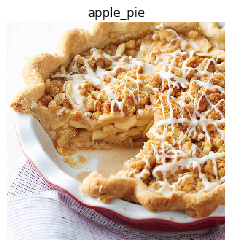

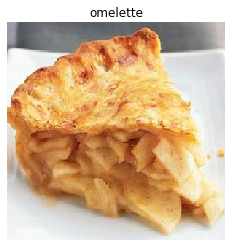

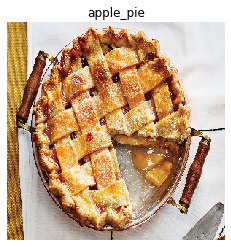

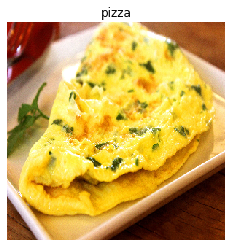

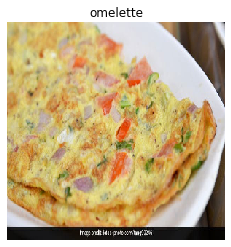

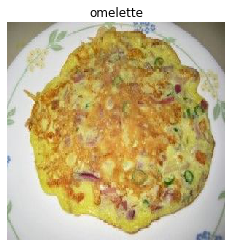

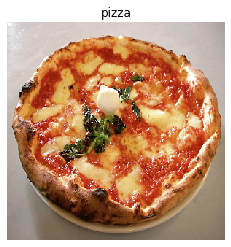

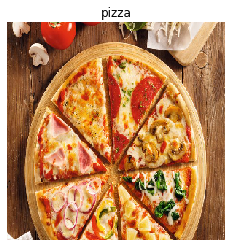

In [42]:
predict_class(model_best, images, True)
